<a href="https://colab.research.google.com/github/erenofc28/Diabetes-Prediction/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_selection import SelectKBest , f_classif

In [ ]:
df = pd.read_csv("/content/diabetes (3).csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
models = {
    "logistic":LogisticRegression(),
    "svm":SVC(),
    "randomforest":RandomForestClassifier()
}

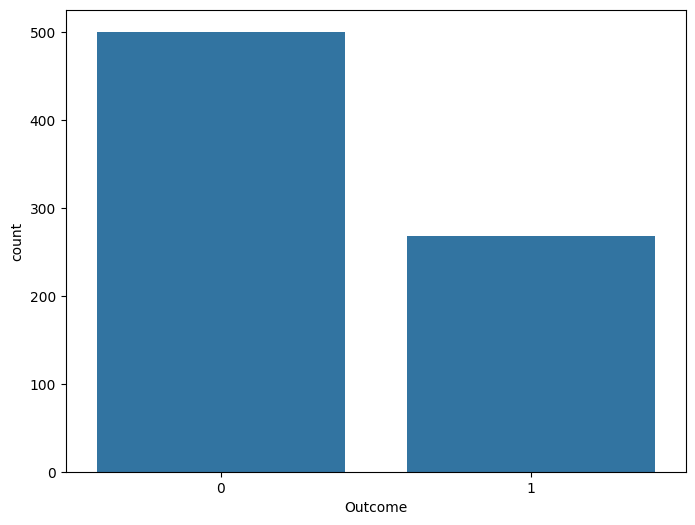

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x = df["Outcome"])
plt.show()

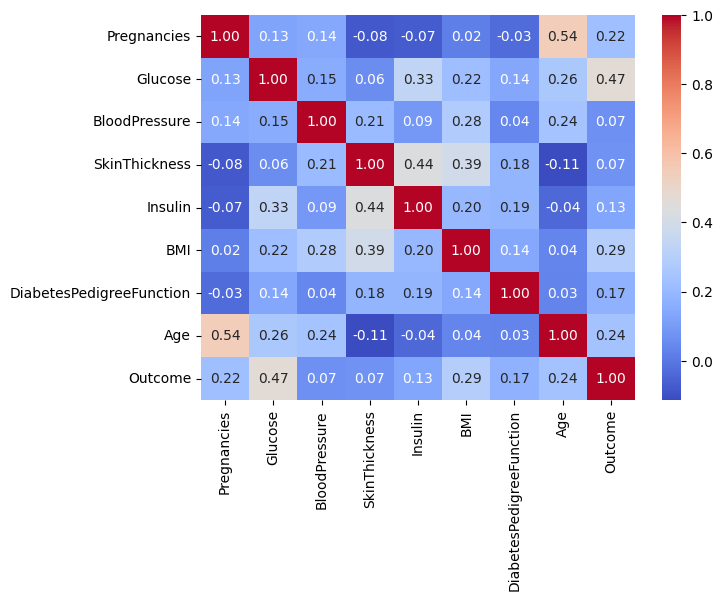

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),fmt=".2f",cbar=True,cmap="coolwarm",annot=True)
plt.show()

In [ ]:
df.shape

(768, 9)

In [ ]:
X = df.drop(columns = ["Outcome"])
y = df["Outcome"]

In [ ]:
selector = SelectKBest(score_func = f_classif , k = 7)
selector.fit_transform(X,y)
X = X.loc[:,selector.get_support()]
X = pd.DataFrame(X)

In [ ]:
smote = SMOTE()
X , y = smote.fit_resample(X,y)

In [ ]:
X.shape

(1000, 7)

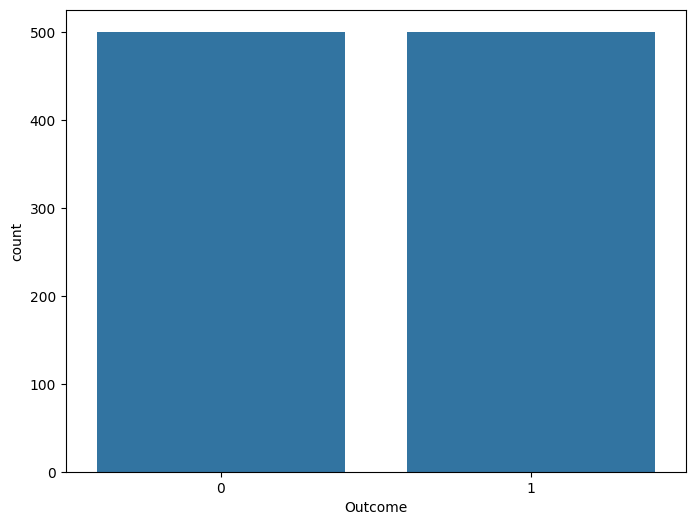

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x = y)
plt.show()

In [ ]:
res = {}
for model_name , model in models.items():
  score = cross_val_score(model ,X,y, scoring = "accuracy",cv=5)
  res[model_name] = score.mean()
  print(model_name,"(std dev) : " ,np.std(score))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

logistic (std dev) :  0.027129319932501096
svm (std dev) :  0.02596150997149436
randomforest (std dev) :  0.05486346689738081


In [ ]:
res

{'logistic': np.float64(0.752),
 'svm': np.float64(0.736),
 'randomforest': np.float64(0.8049999999999999)}

In [ ]:
scaler = StandardScaler()

In [ ]:
X[X.columns] = scaler.fit_transform(X[X.columns])

In [ ]:
X.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.605930,0.670377,0.902565,-0.700515,0.111427,0.472073,1.429510
1,-0.900609,-1.268107,0.528057,-0.700515,-0.810595,-0.398660,-0.254769
2,1.208545,1.747312,-1.282067,-0.700515,-1.245263,0.614041,-0.166123
3,-0.900609,-1.145029,0.153548,0.083936,-0.613019,-0.979150,-1.141233
4,-1.201916,0.331912,0.902565,0.701483,1.362742,5.712251,-0.077477


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,y,stratify=y , train_size = 0.8 , random_state = 3)

In [ ]:
model = LogisticRegression()

In [ ]:
params = {
    "C":[0.1,0.6,0.4,0.2],
    "penalty":["l2","l1"],
    "solver":["liblinear","saga"]
}

In [ ]:
randomsearchcv = RandomizedSearchCV(model,params,cv = 5,n_iter = 20,scoring="accuracy",n_jobs=-1)
randomsearchcv.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.6, 0.4, 0.2],
                                        'penalty': ['l2', 'l1'],
                                        'solver': ['liblinear', 'saga']},
                   scoring='accuracy')

In [ ]:
print(randomsearchcv.best_params_)
print(randomsearchcv.best_score_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.4}
0.753


In [ ]:
# best params found so far,{'solver': 'saga', 'penalty': 'l1', 'C': 0.2}
best_param = randomsearchcv.best_params_
model = LogisticRegression(** best_param ,max_iter = 500)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(C=0.4, max_iter=500, solver='liblinear')

In [ ]:
y_pred = model.predict(x_train)
print(" train score : ",accuracy_score(y_pred, y_train) * 100)
print(classification_report(y_pred,y_train))

 train score :  75.375
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       427
           1       0.72      0.77      0.75       373

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.76      0.75      0.75       800



In [ ]:
y_pred = model.predict(x_test)
print(" test score : ",accuracy_score(y_pred, y_test) * 100)
print(classification_report(y_pred,y_test))

 test score :  77.5
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       103
           1       0.76      0.78      0.77        97

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200



In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x_test.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
570,-0.297993,-1.483494,-1.282067,-0.700515,-0.033462,-0.654202,0.454401
904,0.907237,-0.160402,-1.282067,-0.700515,-0.211674,-0.895200,0.365755
295,0.605930,0.762686,0.652893,0.300912,0.361690,0.677138,-0.520708
169,-0.297993,-0.468098,-0.533050,-0.049587,-0.573504,0.055635,-0.432062
641,0.003314,0.054985,-1.282067,-0.700515,0.203629,-0.550092,-0.875294


In [ ]:
y_test.head()

,Outcome
570,0
904,1
295,0
169,0
641,0


In [ ]:
input = (-0.297993,	-1.483494,	-1.282067,	-0.700515,	-0.033462	,-0.654202	,0.454401)
input = np.asarray(input)
input = input.reshape(1,-1)
pred = model.predict(input)
print(pred) # expected : 0

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
